# Linear Regression

## Multivariate Probability Theory

### Dependence
- Consider random variables $X$, $Y\in\mathbb{R}$
- Dependent variables: $\displaystyle P(X, Y) \neq P(X)\,P(Y)$ 

### Covariance
- Definition: $\displaystyle \textrm{cov}(X,Y)=\mathbb{E}\Big[\big(X-\mathbb{E}[X]\big)\big(Y-\mathbb{E}[Y]\big)\Big]$  
    - Other notations: $\mathrm{C}_{X,Y}$, $\sigma(X,Y)$, ...
- Sample covariance: $\displaystyle C = \frac{1}{N\!-\!1}\sum_{i=1}^N (x_i-\bar{x})(y_i-\bar{y})$

### Correlation
- $\displaystyle \textrm{corr}(X,Y)=\frac{\textrm{cov}(X,Y)}{\sigma_X\,\sigma_Y}$  

### Vector Notation
- Let $\boldsymbol{V}$ represent the 2-vector of random scalar variables $X$ and $Y$
    - $\boldsymbol{V} = \begin{pmatrix}X\\Y\end{pmatrix}$
- Mean: $\displaystyle \mathbb{E}[\boldsymbol{V}] = \begin{pmatrix}\mathbb{E}[X]\\\mathbb{E}[Y]\end{pmatrix} = \begin{pmatrix}\mu_X\\\mu_Y\end{pmatrix}$
- Covariance matrix: $\displaystyle \Sigma_{\boldsymbol{V}} = \mathbb{E}\Big[\big(\boldsymbol{V}\!-\!\mathbb{E}[\boldsymbol{V}]\big)\big(\boldsymbol{V}\!-\!\mathbb{E}[\boldsymbol{V}]\big)^T\Big]$ $ = \left( \begin{array}{ccc}
\sigma_X^2 & \mathrm{C}_{X,Y}  \\
\mathrm{C}_{Y,X} & \sigma_Y^2  \end{array} \right)$
- Same generalization of variance works in any dimensions

### Bivariate Normal Distribution
- Independent and uncorrelated: $ \displaystyle {\cal N}(x,y;\mu_x,\mu_y,\sigma_x,\sigma_y) = \frac{1}{2 \pi \sigma_x \sigma_y}\ \exp\left[-\frac{(x\!-\!\mu_x)^2}{2\sigma_x^2} -\frac{(y\!-\!\mu_y)^2}{2\sigma_y^2} \right] $
- In general, for 2-vector $\boldsymbol{x}$: $ \displaystyle{\cal N}(\boldsymbol{x};\boldsymbol{\mu},\Sigma) = \frac{1}{2\pi \lvert \Sigma \rvert^{\frac{1}{2}} }\ \exp\left[-\frac{1}{2} (\boldsymbol{x}\!-\!\boldsymbol{\mu})^T \Sigma^{-1} (\boldsymbol{x}\!-\!\boldsymbol{\mu})\right]$
    - where $\lvert \Sigma \rvert$ is the determinant - other notation $\det\Sigma$ or $\det\!\left(\Sigma\right)$
- Uncorrelated if: $ \displaystyle \Sigma = \left( \begin{array}{ccc}
\sigma_X^2 & 0  \\
0 & \sigma_Y^2  \end{array} \right)$

### Multivariate Normal Distribution
- In $k$ dimensions - not bold but $k$-vectors: $ \displaystyle{\cal N}(x;\mu,\Sigma) = \frac{1}{\sqrt{(2\pi)^{k} \lvert \Sigma \rvert} }\ \exp\left[-\frac{1}{2} (x\!-\!\mu)^T \Sigma^{-1} (x\!-\!\mu)\right]$

- Or even simpler: $ \displaystyle{\cal N}(x;\mu,\Sigma) = \frac{1}{\sqrt{\lvert 2\pi \Sigma \rvert} }\ \exp\left[-\frac{1}{2} (x\!-\!\mu)^T \Sigma^{-1} (x\!-\!\mu)\right]$

averages: [2.07575904 5.08392957]


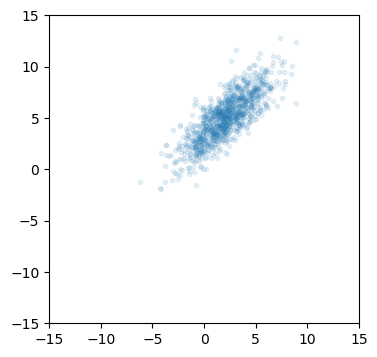

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# generate many 2D (column) vectors
X = scipy.stats.norm(0,1).rvs((2,1000))
X[0,:] *= 3  # scale axis 0
f = np.pi/4  # rotate by f
R = np.array([[np.cos(f),-np.sin(f)],
              [np.sin(f), np.cos(f)]]) 
V = R @ X
V += np.array([[2],
               [5]]) # shift with a vector
# plot on square figure
plt.figure(figsize=(4,4)); a=15; plt.xlim(-a,a); plt.ylim(-a,a)
plt.plot(V[0,:],V[1,:], '.', alpha=0.1)

averages = V.mean(axis=1)
print('averages:', averages)

In [3]:
#avg = averages.reshape(averages.size,1)
avg = averages[:,np.newaxis] 
print ("Mean Vector: ")
print (avg)

# sample covariance matrix
C = (V-avg) @ (V-avg).T / (V.shape[1]-1) 
print ("Covariance Matrix:")
print (C) 

Mean Vector: 
[[2.07575904]
 [5.08392957]]
Covariance Matrix:
[[5.19667884 4.1723471 ]
 [4.1723471  5.24568005]]


## Ordinary Least Squares

### The Idea
- Fit a model to training set $\big\{ (x_i, y_i) \big\}$
    - Parameterized function $f(x;\theta)$, where $\theta$ can represent multiple parameters
- Minimize the mean or sum of square errors or residuals (SSE, SSR, MSE, MSR?)
    - Residual: $r_i(\theta) = y_i - f(x_i;\theta)$
- Estimation: $\displaystyle \hat{\theta} = \arg\min_{\theta} \sum_i \big[y_i-f(x_i;\theta)\big]^2$
- Optimization is simple for certain models

### The Simplest Case
- Fitting a constant? Model with $f(x;\mu)=\mu$: $\displaystyle C(\mu) = \sum_{i=1}^N \big(y_i\!-\!\mu\big)^2$
- Derivative $C'= dC \big/ d\mu$ vanishes at solution $\hat{\mu}$
>$\displaystyle C'(\hat{\mu}) = 0$
>
>$\displaystyle 2\sum_{i=1}^N \big(y_i\!-\!\hat{\mu}\big)(-1)=0$
>
>$\displaystyle \sum_{i=1}^N y_i - N \hat{\mu} = 0 $
>
>$\displaystyle \hat{\mu} = \frac{1}{N}\sum_{i=1}^N y_i \ \ \ \ \ $  -  average

### Heteroscedasticity
- Same model with $f(x;\mu)=\mu$

>$\displaystyle C(\mu) = \sum_{i=1}^N \frac{\big(y_i\!-\!\mu\big)^2}{\sigma_i^2} $ with  $\ w_i=1 \big/ \sigma_i^2$
>
>$\displaystyle  C(\mu) = \sum_{i=1}^N w_i\big(y_i\!-\!\mu\big)^2 $

- Derivative $C'= dC \big/ d\mu$ vanishes at $\hat{\mu}$
>$\displaystyle C'(\hat{\mu}) = 0$
>
>$\displaystyle 2\sum_{i} w_i \big(y_i\!-\!\hat{\mu}\big)(-1)=0$
>
>$\displaystyle \sum_{i} w_i y_i - \hat{\mu}\sum_{i} w_i  = 0 $
>
>$\displaystyle \hat{\mu} = \frac{\sum w_i y_i}{\sum w_i} \ \ \ \ \ \ $ - weighted average

### Simple Fitting
- A linear model with $\boldsymbol{\theta}=(a,b)^T$ parametrization $f(x;\boldsymbol{\theta}) = a + b\,x$
    - $\displaystyle \hat{\boldsymbol\theta} = \arg\min \sum_i \big[y_i-(a + b\,x_i)\big]^2$
    - Derivatives w.r.t. $a$ and $b$ should vanish
    - We have 2 variables and 2 equations: Quadratic becomes linear $\rightarrow$ analytic solution!

### Linear Regression
- A linear combination of known $\phi_k(\cdot)$ functions (basis functions): $\displaystyle f(x;\boldsymbol{\beta}) = \sum_{k=1}^K \beta_k\, \phi_k(x) $
- It's a dot product: $\displaystyle f(x;\boldsymbol{\beta}) = \boldsymbol\beta^T \boldsymbol\phi(x)$ with $\boldsymbol{\beta}=(\beta_1,\dots,\beta_K)^T$
- Linear in $\boldsymbol{\beta}$, cost function is quadratic: $\displaystyle C = \sum_{i=1}^N \left\{ y_i - \sum_{k=1}^K \beta_k\, \phi_k(x_i) \right\}^2$
- Introducing the design matrix $X$ with components: $\displaystyle X_{ik} = \phi_k(x_i) $
- Linear in $\boldsymbol{\beta}$, cost function is quadratic: $\displaystyle C = \sum_{i=1}^N \left\{ y_i - \sum_{k=1}^K X_{ik}\beta_k\right\}^2$

### Minimization
- Partial derivatives: 
    - $\displaystyle \frac{\partial{}C}{\partial{}\beta_l} = 2\sum_i \left\{ y_i - \sum_{k=1}^K X_{ik}\beta_k \right\} \left[ -\frac{\partial f(x_i;\boldsymbol{\beta})}{\partial \beta_l} \right]$
    - $\displaystyle \frac{\partial f(x_i;\boldsymbol{\beta})}{\partial \beta_l} =\sum_k \frac{\partial{}\beta_k}{\partial{}\beta_l}\,\phi_k(x_i) = \phi_l(x_i) = X_{il}$
- **Note:** $\partial{}\beta_k \big/ \partial{}\beta_l=\delta_{kl}$ Kronecker delta
$\delta_{kl} = 
\left\{
\begin{array}{ll}
1 & \text{if } k = l,\\
0 & \text{if } k \neq l.
\end{array}
\right.$
- Useful to remember: $ \displaystyle \sum_l \delta_{kl}\,a_l = a_k$
- Cf. identity matrix: $ I\, \boldsymbol{a} = \boldsymbol{a}$

### Result

- At the optimum we have


>$\displaystyle \sum_i \left\{ y_i - \sum_{k} \hat\beta_k\, \phi_k(x_i) \right\}\, \phi_l(x_i)  = 0$
> <br/><br/>
>$\displaystyle \sum_i \left\{ y_i - \sum_{k} X_{ik}\hat\beta_k\ \right\}\, X_{il}  = 0$
> <br/><br/>
>$\displaystyle \sum_i X_{il} y_i  - \sum_i \sum_k  X_{il} X_{ik} \hat{\beta}_k = 0$
> <br/><br/>
>$\displaystyle \sum_i  X_{il} y_i = \sum_k \left(\sum_i X_{il} X_{ik}\right) \hat{\beta}_k$

- I.e.,

>$\displaystyle X^T y = X^T X \hat{\beta} $
> <br/><br/>
>$\displaystyle \hat\beta = (X^T X)^{-1} X^T y = X^+ y$, the Moore-Penrose (Generalized) Inverse from SVD

### Hat matrix
- Looking at the definition of $X$ we see that the model at $\hat{\beta}$ predicts $\hat{y}_i$ values $\displaystyle \hat{y} = X\,\hat\beta = X\,(X^T X)^{-1} X^T y $ which is $\displaystyle \hat{y}  = H\,y\ \ \ $ with $\ \ \displaystyle {H} = X\,(X^T X)^{-1} X^T$

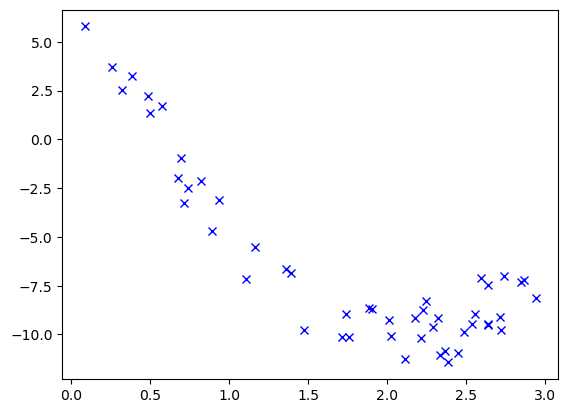

In [4]:
# generate sample with error
x = 3 * np.random.rand(50) # between 0 and 3
e = 1 * np.random.randn(x.size) # noise
#y = (0.1*x**3 + 0.5*x**2 + 2*x + 1) + e;  plot(x,y,'bo');
y = 10*np.cos(x+1) + e;  plt.plot(x,y,'bx')

array([ 1.56066263, -4.5537729 ])

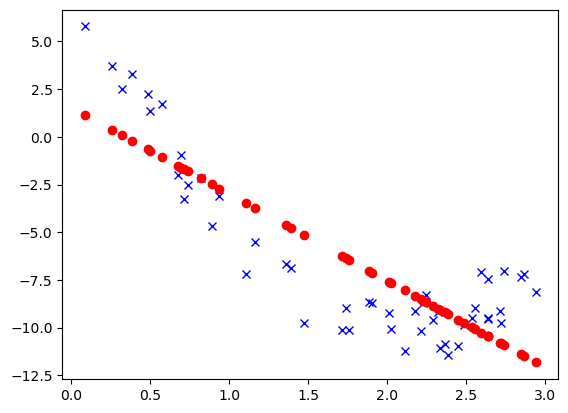

In [5]:
# linear model f(x) = b0 + b1 x
X = np.ones((x.size,2));
X[:,1] = x

Xpinv = np.linalg.inv(X.T @ X) @ X.T
bHat = Xpinv @ y
yHat = X @ bHat

plt.plot(x,y,'bx'); plt.plot(x,yHat,'ro'); bHat

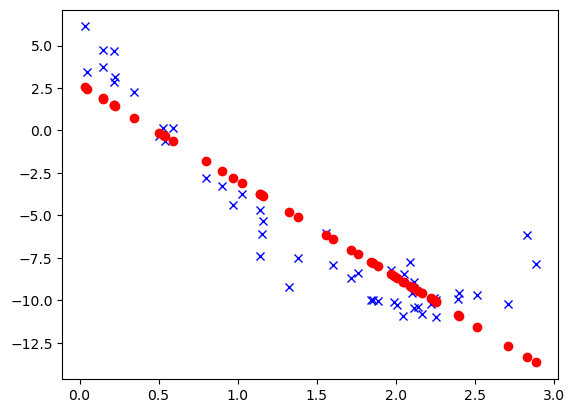

In [7]:
# same with pinv() and the Hat matrix
H = X @ np.linalg.pinv(X)
yHat = H @ y

plt.plot(x,y,'bx'); plt.plot(x,yHat,'ro');

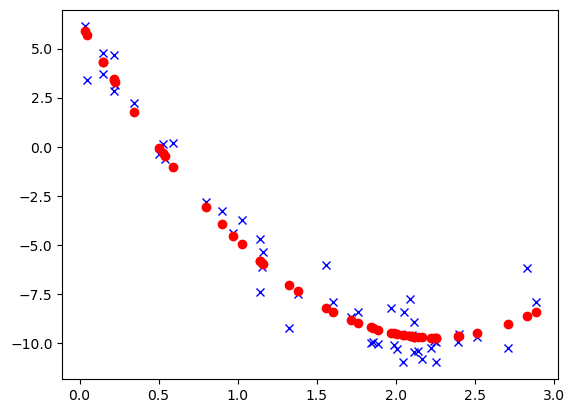

In [8]:
# linear model f(x) = b0 + b1 x + b2 * x^2
X = np.ones((x.size,3));
X[:,1] = x    # partials wrt. b1
X[:,2] = x*x  # wrt. b2

# the rest is the same as before
bHatQ = np.linalg.pinv(X) @ y
yHatQ = X @ bHatQ

plt.plot(x,y,'bx'); plt.plot(x,yHatQ,'ro');

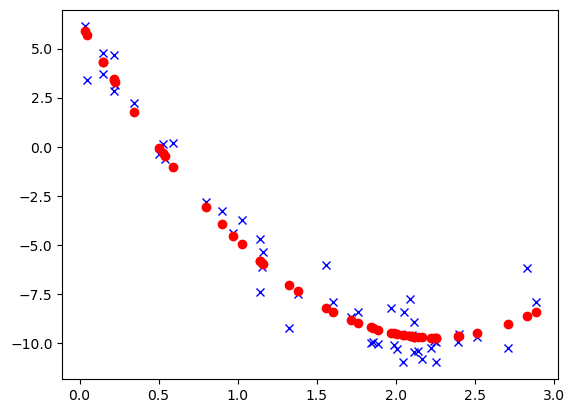

In [9]:
# or like this
yHatQ = X @ np.linalg.pinv(X) @ y

plt.plot(x,y,'bx'); plt.plot(x,yHatQ,'ro');

### Heteroscedastic error
- Simple modification: $\displaystyle C = \sum_{i=1}^N w_i \left\{ y_i - \sum_{k=1}^K X_{ik}\beta_k\right\}^2$
- yields: $\displaystyle \sum_i w_i \left\{ y_i - \sum_{k} X_{ik} \hat\beta_k\ \right\}\, X_{il}  = 0$
- $\displaystyle \sum_i  X_{il} w_i y_i = \sum_k \left(\sum_i X_{il} w_i X_{ik}\right) \hat{\beta}_k$
- Diagonal weight matrix $W$ with components $W_{ij}=w_i\,\delta_{ij}$ 
    - $\displaystyle X^T W y = X^T W X \hat{\beta} $
    - $\displaystyle \hat\beta = (X^T W X)^{-1} X^T W y $
- Correlated errors
    - If not diagonal, correlated errors: 
    - the $W$ matrix is the inverse of the covariance matrix, $W=C^{-1}$ 

### Regularization
- Penalize large coefficients of $\beta$
- **Ridge regression** uses $L_2$: $\displaystyle \hat{\beta} = \arg\!\min_{\beta} \, \lvert y- X\beta \,\rvert^2_2\ + \lambda\,\lvert\beta\rvert^2_2$ or even with a constant matrix $\Gamma$
    - $\displaystyle \hat{\beta} = \arg\!\min_{\beta} \, \lvert y- X\beta \,\rvert^2_2 + \lambda\,\lvert\Gamma\beta\rvert^2_2$  
- **Lasso regression** uses $L_1$: $\displaystyle \hat{\beta} = \arg\!\min_{\beta}  \, \lvert y- X\beta \,\rvert^2_2 + \lambda\,\lvert\beta\rvert_1$ 
    - $L_1$ yields sparse results

### Linear Combinations
- Coefficients mix a given set of basis vectors, functions, images, shapes, ...
    - $f(x;\beta) = \sum_k \beta_k \phi_k(x) $
- Fourier series
- Discrete Cosine Transform (JPEG) 
- Spherical Harmonics